# IQ Signals


Conceptos básicos de muestreo

Antes de pasar al muestreo de IQ, analicemos qué significa realmente el muestreo. Es posible que se haya encontrado con el muestreo sin darse cuenta al grabar audio con un micrófono. El micrófono es un transductor que convierte las ondas sonoras en una señal eléctrica (un nivel de voltaje). Esa señal eléctrica es transformada por un convertidor de analógico a digital, produciendo una representación digital de la onda de sonido. Para simplificar, el micrófono captura ondas de sonido que se convierten en electricidad y esa electricidad a su vez se convierte en números. Los DEG son sorprendentemente similares. Sin embargo, en lugar de un micrófono, utilizan una antena. En ambos casos, el nivel de voltaje se muestrea con un convertidor de analógico a digital. Para los SDR, piense en ondas de radio y luego en números.

Ya sea que se trate de frecuencias de audio o de radio, debemos muestrear si queremos capturar, procesar o guardar una señal digitalmente. El muestreo puede parecer sencillo, pero hay mucho que hacer. Una forma más técnica de pensar en el muestreo de una señal es tomar valores en momentos en el tiempo y guardarlos digitalmente. Digamos que tenemos una función aleatoria S t), que podría representar cualquier cosa, y es una función continua que queremos muestrear:


Registramos el valor de S t)a intervalos regulares de Tsegundos, conocido como período de muestra . La frecuencia a la que tomamos muestras, es decir, el número de muestras tomadas por segundo, es simplemente \ frac {1} {T}. A esto lo llamamos la frecuencia de muestreo , y es la inversa del período de muestreo. Por ejemplo, si tenemos una frecuencia de muestreo de 10 Hz, entonces el período de muestreo es de 0,1 segundos; habrá 0,1 segundos entre cada muestra. En la práctica, nuestras frecuencias de muestreo serán del orden de cientos de kHz a decenas de MHz o incluso más. Cuando muestreamos señales, debemos tener en cuenta la frecuencia de muestreo, es un parámetro muy importante.

Para aquellos que prefieren ver las matemáticas; let S_nrepresente muestra norte, generalmente un número entero que comienza en 0. Usando esta convención, el proceso de muestreo se puede representar matemáticamente como S_n = S (nT)para valores enteros de norte. Es decir, evaluamos la señal analógica S t)en estos intervalos de Nuevo Testamento.
Muestreo de Nyquist

Para una señal dada, la gran pregunta a menudo es ¿qué tan rápido debemos muestrear? Examinemos una señal que es solo una onda sinusoidal, de frecuencia f, que se muestra en verde a continuación. Digamos que muestreamos a una tasa Fs (las muestras se muestran en azul). Si muestreamos esa señal a una velocidad igual af (es decir, Fs = f), obtendremos algo que se parece a:
../_images/sampling_Fs_0.3.svg

La línea punteada roja en la imagen de arriba reconstruye una función diferente (incorrecta) que podría haber llevado a que se registraran las mismas muestras. Indica que nuestra frecuencia de muestreo era demasiado baja porque las mismas muestras podrían provenir de dos funciones diferentes, lo que genera ambigüedad. Si queremos reconstruir con precisión la señal original, no podemos tener esta ambigüedad.

Intentemos muestrear un poco más rápido, en Fs = 1.2f:
../_images/sampling_Fs_0.36.svg

Una vez más, hay una señal diferente que podría ajustarse a estas muestras. Esta ambigüedad significa que si alguien nos diera esta lista de muestras, no podríamos distinguir qué señal era la original en función de nuestro muestreo.

¿Qué tal el muestreo en Fs = 1.5f:
../_images/sampling_Fs_0.45.svg

¡Todavía no es lo suficientemente rápido! De acuerdo con una parte de la teoría DSP en la que no nos sumergiremos, debe muestrear al doble de la frecuencia de la señal para eliminar la ambigüedad que estamos experimentando:
../_images/sampling_Fs_0.6.svg

Esta vez no hay una señal incorrecta porque muestreamos lo suficientemente rápido como para que no exista ninguna señal que se ajuste a estas muestras que no sea la que ve (a menos que aumente la frecuencia, pero lo discutiremos más adelante).

En el ejemplo anterior, nuestra señal era solo una onda sinusoidal simple, la mayoría de las señales reales tendrán muchos componentes de frecuencia. Para muestrear con precisión cualquier señal dada, la frecuencia de muestreo debe ser "al menos el doble de la frecuencia del componente de frecuencia máxima". He aquí una forma de visualizar eso:
../_images/max_freq.png

Debemos identificar el componente de frecuencia más alta, luego duplicarlo y asegurarnos de muestrear a esa velocidad o más rápido. La tasa mínima en la que podemos muestrear se conoce como Tasa de Nyquist. En otras palabras, la Tasa de Nyquist es la tasa mínima a la que se necesita muestrear una señal (ancho de banda finito) para retener toda su información. Es una pieza de teoría extremadamente importante dentro de DSP y SDR que sirve como puente entre señales continuas y discretas.
../_images/nyquist_rate.png

Si no tomamos muestras lo suficientemente rápido, obtenemos algo llamado aliasing, del que aprenderemos más adelante, pero tratamos de evitarlo a toda costa. Lo que hacen nuestros SDR (y la mayoría de los receptores en general) es filtrar todo lo que esté por encima de Fs / 2 justo antes de realizar el muestreo. Si intentamos recibir una señal con una frecuencia de muestreo demasiado baja, ese filtro cortará parte de la señal. Nuestros SDR hacen todo lo posible para proporcionarnos muestras libres de aliasing y otras imperfecciones.

Si no tomamos muestras lo suficientemente rápido, obtenemos algo llamado aliasing, del que aprenderemos más adelante, pero tratamos de evitarlo a toda costa. Lo que hacen nuestros SDR (y la mayoría de los receptores en general) es filtrar todo lo que esté por encima de Fs / 2 justo antes de realizar el muestreo. Si intentamos recibir una señal con una frecuencia de muestreo demasiado baja, ese filtro cortará parte de la señal. Nuestros SDR hacen todo lo posible para proporcionarnos muestras libres de aliasing y otras imperfecciones.
Muestreo en cuadratura

El término "cuadratura" tiene muchos significados, pero en el contexto de DSP y SDR se refiere a dos ondas que están desfasadas 90 grados. ¿Por qué 90 grados desfasados? Considere cómo dos ondas que están desfasadas 180 grados son esencialmente la misma onda con una multiplicada por -1. Al estar 90 grados desfasados, se vuelven ortogonales, y hay muchas cosas interesantes que puedes hacer con las funciones ortogonales. En aras de la simplicidad, usamos seno y coseno como nuestras dos ondas sinusoidales que están desfasadas 90 grados.

A continuación, asignemos variables para representar la amplitud del seno y el coseno. Usaremos Ipara el cos () y Qpara el sin ():

Yo \ cos (2 \ pi ft) Q \ sin (2 \ pi ft)

Podemos ver esto visualmente trazando I y Q iguales a 1:
../_images/IQ_wave.png

Llamamos al cos () el componente "en fase", de ahí el nombre I, y el sin () es el componente 90 grados fuera de fase o "cuadratura", de ahí Q. Aunque si accidentalmente lo mezcla y asigna Q a el cos () y yo el pecado (), no hará una diferencia en la mayoría de las situaciones.

El muestreo de IQ se comprende más fácilmente utilizando el punto de vista del transmisor, es decir, considerando la tarea de transmitir una señal de RF a través del aire. Lo que hacemos como transmisor es sumar sin () y cos (). Digamos que x (t) es nuestra señal para transmitir:

x (t) = yo \ cos (2 \ pi ft) + Q \ sin (2 \ pi ft)

¿Qué sucede cuando agregamos un seno y un coseno? O más bien, ¿qué sucede cuando agregamos dos sinusoides que están desfasados ​​90 grados? En el siguiente video, hay un control deslizante para ajustar I y otro para ajustar Q. Lo que se traza son el coseno, el seno y luego la suma de los dos.
../_images/IQ2.gif

(El código utilizado para esta aplicación Python basada en pyqtgraph se puede encontrar aquí )

Las conclusiones importantes son que cuando sumamos cos () y sin (), obtenemos otra onda sinusoidal pura con una fase y amplitud diferentes. Además, la fase cambia a medida que retiramos o agregamos lentamente una de las dos partes. La amplitud también cambia. Todo esto es el resultado de la identidad trigonométrica:a \ cos (x) + b \ sin (x) = A \ cos (x- \ phi), al que volveremos en un momento. La "utilidad" de este comportamiento es que podemos controlar la fase y la amplitud de una onda sinusoidal resultante ajustando las amplitudes I y Q (no tenemos que ajustar la fase del coseno o del seno). Por ejemplo, podríamos ajustar I y Q de una manera que mantenga la amplitud constante y haga que la fase sea la que queramos. Como transmisor, esta capacidad es extremadamente útil porque sabemos que necesitamos transmitir una señal sinusoidal para que vuele por el aire como una onda electromagnética. Y es mucho más fácil ajustar dos amplitudes y realizar una operación de suma en comparación con ajustar una amplitud y una fase. El resultado es que nuestro transmisor se verá así:
../_images/IQ_diagram.png

Solo necesitamos generar una onda sinusoidal y cambiarla 90 grados para obtener la porción Q.
Números complejos

En última instancia, la convención de IQ es una forma alternativa de representar la magnitud y la fase, lo que nos lleva a números complejos y la capacidad de representarlos en un plano complejo. Es posible que haya visto números complejos antes en otras clases. Tome el número complejo 0.7-0.4j como ejemplo:
../_images/complex_plane_1.png

Un número complejo es en realidad solo dos números juntos, una parte real y una imaginaria. Un número complejo también tiene una magnitud y una fase, lo que tiene más sentido si lo considera un vector en lugar de un punto. La magnitud es la longitud de la línea entre el origen y el punto (es decir, la longitud del vector), mientras que la fase es el ángulo entre el vector y 0 grados, que definimos como el eje real positivo:
../_images/complex_plane_2.png

Esta representación de una sinusoide se conoce como "diagrama fasorial". Es simplemente trazar números complejos y tratarlos como vectores. Ahora bien, ¿cuál es la magnitud y la fase de nuestro número complejo de ejemplo 0,7-0,4j? Para un número complejo dado donde aestá la parte real y Bla parte imaginaria:

\ mathrm {magnitud} = \ sqrt {a ^ 2 + b ^ 2} = 0.806 \ mathrm {fase} = \ tan ^ {- 1} \ left (\ frac {b} {a} \ right) = -29.7 ^ {\ circ} = -0,519 \ quad \ mathrm {radianes}

En Python puede usar np.abs (x) y np.angle (x) para la magnitud y la fase. La entrada puede ser un número complejo o una matriz de números complejos, y la salida será un número real (s) (del tipo de datos flotante).

Es posible que ya se haya dado cuenta de cómo este diagrama vectorial o fasorial se relaciona con la convención de CI: I es real y Q es imaginario. A partir de este punto, cuando dibujemos el plano complejo, lo etiquetaremos con I y Q en lugar de real e imaginario. ¡Siguen siendo números complejos!
../_images/complex_plane_3.png

Ahora digamos que queremos transmitir nuestro punto de ejemplo 0.7-0.4j. Estaremos transmitiendo:

x (t) = I \ cos (2 \ pi ft) + Q \ sin (2 \ pi ft) \ quad \ quad \ quad = 0.7 \ cos (2 \ pi ft) - 0.4 \ sin (2 \ pi ft)

Podemos usar la identidad trigonométrica a \ cos (x) + b \ sin (x) = A \ cos (x- \ phi)donde se Aencuentra nuestra magnitud con \ sqrt {I ^ 2 + Q ^ 2}y \fies nuestra fase, igual a \ tan ^ {- 1} \ left (Q / I \ right). La ecuación anterior ahora se convierte en:

x (t) = 0,806 \ cos (2 \ pi ft + 0,519)

Aunque comenzamos con un número complejo, lo que estamos transmitiendo es real, lo cual es bueno porque en realidad no se puede transmitir algo imaginario con ondas electromagnéticas. Solo usamos números imaginarios / complejos para representar lo que estamos transmitiendo. Hablaremos del en Fbreve.
Números complejos en FFTs

Se asumió que los números complejos anteriores eran muestras del dominio del tiempo, pero también se encontrará con números complejos cuando realice una FFT. Cuando cubrimos las series de Fourier y las FFT en el último capítulo, aún no nos habíamos sumergido en números complejos. Cuando toma la FFT de una serie de muestras, encuentra la representación del dominio de frecuencia. Hablamos sobre cómo la FFT determina qué frecuencias existen en ese conjunto de muestras (la magnitud de la FFT indica la fuerza de cada frecuencia). Pero lo que hace la FFT también es calcular el retardo (cambio de tiempo) necesario para aplicar a cada una de esas frecuencias, de modo que el conjunto de sinusoides pueda sumarse para reconstruir la señal en el dominio del tiempo. Ese retraso es simplemente la fase de la FFT. La salida de una FFT es una matriz de números complejos, y cada número complejo le da la magnitud y la fase,y el índice de ese número te da la frecuencia. Si genera sinusoides en esas frecuencias / magnitudes / fases y las suma, obtendrá su señal original en el dominio del tiempo (o algo muy parecido, y ahí es donde entra en juego el teorema de muestreo de Nyquist).
Lado del receptor

Ahora tomemos la perspectiva de un receptor de radio que está tratando de recibir una señal (por ejemplo, una señal de radio FM). Usando el muestreo de IQ, el diagrama ahora se ve así:
../_images/IQ_diagram_rx.png

Lo que entra es una señal real recibida por nuestra antena, y esas se transforman en valores de IQ. Lo que hacemos es muestrear las ramas I y Q individualmente, usando dos convertidores de analógico a digital (ADC), y luego combinamos los pares y los almacenamos como números complejos. En otras palabras, en cada paso de tiempo, tomará una muestra de un valor I y un valor Q y los combinará en el formulario I + jQ(es decir, un número complejo por muestra de IQ). Siempre habrá una "tasa de muestreo", la tasa a la que se realiza el muestreo. Alguien podría decir: "Tengo un SDR funcionando a una frecuencia de muestreo de 2 MHz". Lo que quieren decir es que el SDR recibe dos millones de muestras de CI por segundo.

Si alguien le da un montón de muestras de IQ, se verá como una matriz / vector 1D de números complejos. Este punto, complejo o no, es en lo que se ha estado construyendo todo este capítulo, y finalmente lo logramos.

A lo largo de este libro de texto que se convertirá en muy familiarizado con cómo funcionan las muestras IQ, la forma de recibir y transmitir con un SDR, la forma de procesarlos en Python, y cómo guardar en un archivo para su posterior análisis.

Una última nota importante: la figura anterior muestra lo que está sucediendo dentro del SDR. En realidad, no tenemos que generar una onda sinusoidal, cambiar en 90, multiplicar o sumar, el SDR lo hace por nosotros. Le decimos al SDR a qué frecuencia queremos muestrear, oa qué frecuencia queremos transmitir nuestras muestras. En el lado del receptor, el SDR nos proporcionará las muestras de IQ. Para el lado transmisor, tenemos que proporcionar al SDR las muestras de IQ. En términos de tipo de datos, serán entradas o flotantes complejas.




https://pysdr.org/content/sampling.html#



In [12]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


import numpy as np
import matplotlib.pyplot as plt

import scipy                  # http://scipy.org/
from scipy.fftpack import fft, fftfreq
from time import time



%matplotlib inline

params = {'legend.fontsize': 24,
          'figure.figsize': (15, 5),
         'axes.labelsize': 24,
         'axes.titlesize': 24,
         'xtick.labelsize':24,
         'ytick.labelsize':24}
plt.rcParams.update(params)



In [27]:
# Ejemplo AM en el tiempo
fm   = 100 #Hz
# I
Ai   = 1  
# Q
Aq   = 0.5

# defino el sampleo
Fs = 50*fm #Sps 
dt = 1/Fs
# tiempo maximo del analisis 
T = 2/fm
# vector de tiempo 
time  = np.arange(0, T, dt)


# modulante
def IQ_sum(time, Ai, Aq):
    I   = Ai*np.cos(2*np.pi*fm*time) 
    Q   = Aq*np.sin(2*np.pi*fm*time) 
    plt.plot(time, I, 'r.')
    plt.plot(time, Q, 'g.')
    plt.plot(time, I+Q)
    plt.show()

In [13]:
interact(IQ_sum,time=fixed(time), Ai=(0.1,1,0.1), Aq=(0.1, 1, 0.1) )

interactive(children=(FloatSlider(value=0.5, description='Ai', max=1.0, min=0.1), FloatSlider(value=0.5, descr…

<function __main__.IQ_sum(time, Ai, Aq)>

In [25]:
import numpy as np
import matplotlib.pyplot as plt

origin = np.array([[0,0,0],[0,0,0]]) # origin point

def PltVct(Ai,Aq):
    V = np.array([[Ai,0], [0,Aq], [Ai,Aq]])

    plt.quiver(*origin, V[:,0], V[:,1], color=['r','b','g'], scale=5)
    plt.show()

In [26]:
interact(PltVct, Ai=(-1,1,0.1), Aq=(-1, 1, 0.1) )

interactive(children=(FloatSlider(value=0.0, description='Ai', max=1.0, min=-1.0), FloatSlider(value=0.0, desc…

<function __main__.PltVct(Ai, Aq)>

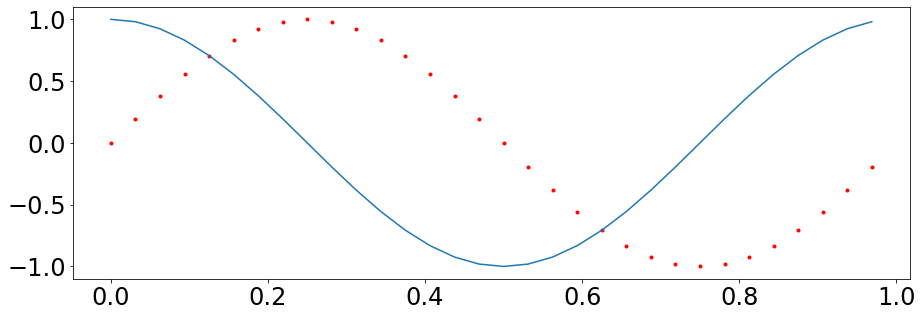

In [41]:
import math
from scipy.fftpack import *


fm   = 1 #Hz
# defino el sampleo
Fs = 32*fm #Sps 
dt = 1/Fs
# tiempo maximo del analisis 
T = 1/fm
# vector de tiempo 
time  = np.arange(0, T, dt)


y = np.sin(2*np.pi*f*time)

z = hilbert(y)
#print(" n     y fromscratch scipy")
#for n in range(len(time)):
#    print('{:2d} {:+5.2f} {:+10.2f} {:+5.2f}'.format(n, y[n], z1[n], z2[n]))

plt.plot(time, y, 'r.')
plt.plot(time, z)

